In [1]:
import pickle
import sklearn
from sklearn.cluster import KMeans, DBSCAN
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import manifold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
# Read features
infile = open('RawPixels.pckl','rb')
features = pickle.load(infile)
infile.close()

# Classification (feature set VGG16)

In [3]:
# Array to store results of classifiers
Results = np.empty((6,3), dtype='object')
Validation = np.empty((6,5), dtype='object')

In [4]:
# Split data
real_labels = features[:,-1]
features = features[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(features, real_labels, test_size=0.2, stratify = real_labels)

## Logistic Regression

In [5]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Error train: 0.0 %
Error test: 8.425720620842569 %


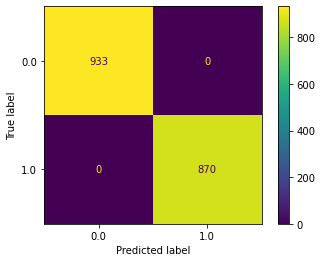

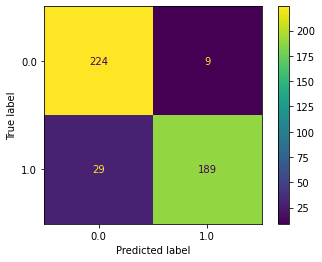

In [6]:
plot_confusion_matrix(logistic,X_train,y_train)
err = np.sum(logistic.predict(X_train) == y_train)/len(y_train)
Results[0,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
Results[0,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")


In [9]:
k = 5
cross_scores = cross_val_score(logistic, features, real_labels, cv=k, scoring='f1_weighted')
Validation[0,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.82654321 0.95550056 0.96443636 0.91288564 0.78646382]


## SVM (linear kernel)

In [13]:
parameters = {'C':[0.1,0.01,1,10]}
linear_kernel_svm_clf = SVC(kernel = "linear")
clf_linear = GridSearchCV(linear_kernel_svm_clf, parameters)
clf_linear.fit(X_train, y_train)
print(clf_linear.best_params_)
Results[1,2]=clf_linear.best_params_

{'C': 0.1}


In [14]:
clf_linear = SVC(kernel = "linear", C = 0.1)
clf_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

Error train: 0.0 %
Error test: 7.982261640798227 %


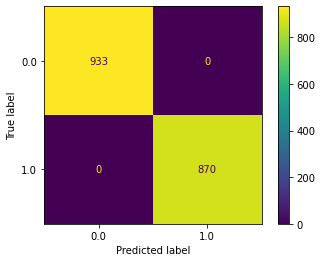

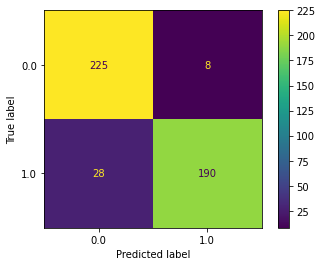

In [15]:
plot_confusion_matrix(clf_linear,X_train,y_train)
err = np.sum(clf_linear.predict(X_train) == y_train)/len(y_train)
Results[1,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_linear,X_test,y_test)
err = np.sum(clf_linear.predict(X_test) == y_test)/len(y_test)
Results[1,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [16]:
cross_scores = cross_val_score(clf_linear, features, real_labels, cv=k)
Validation[1,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.86031042 0.94900222 0.97339246 0.89356984 0.76444444]


## SVM (polynomial)

In [17]:
parameters = {'degree':[2,3,4,5], 'C':[0.1,0.01,1]}
poly_kernel_svm_clf = SVC(kernel = "poly")
clf = GridSearchCV(poly_kernel_svm_clf, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
Results[2,2]=clf.best_params_

{'C': 1, 'degree': 2}


In [18]:
clf = SVC(kernel = "poly", C = 1, degree = 2)
clf.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly')

Error train: 0.16638935108153063 %
Error test: 7.317073170731703 %


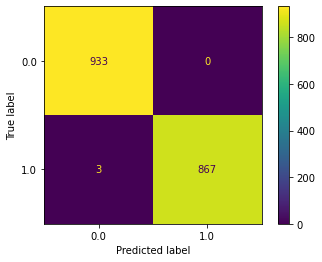

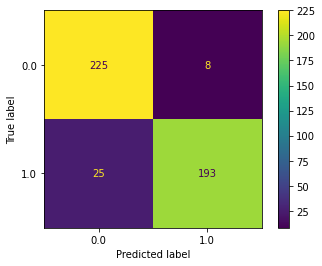

In [19]:
plot_confusion_matrix(clf,X_train,y_train)
err = np.sum(clf.predict(X_train) == y_train)/len(y_train)
Results[2,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf,X_test,y_test)
err = np.sum(clf.predict(X_test) == y_test)/len(y_test)
Results[2,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [20]:
clf = SVC(kernel = "poly", C = 10, degree = 2)
cross_scores = cross_val_score(clf, features, real_labels, cv=k)
Validation[2,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.94456763 0.94900222 0.97339246 0.92017738 0.81111111]


## SVM (rbf)

In [26]:
parameters = {'C':[0.1,0.01,1]}
rbf_kernel_svm_clf = SVC(kernel = "rbf")
clf_rbf = GridSearchCV(rbf_kernel_svm_clf, parameters)
clf_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 0.01, 1]})

In [27]:
print(clf_rbf.best_params_)
Results[3,2]=clf_rbf.best_params_

{'C': 1}


In [28]:
clf_rbf = SVC(kernel = "rbf", C = 1)
clf_rbf.fit(X_train, y_train)

SVC(C=1)

Error train: 0.88740987243483 %
Error test: 2.4390243902439046 %


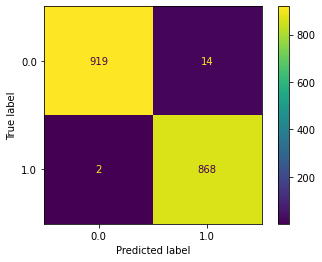

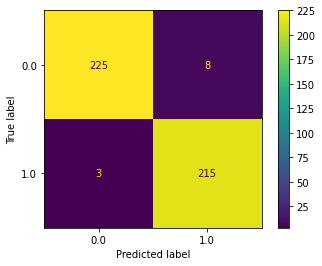

In [29]:
plot_confusion_matrix(clf_rbf,X_train,y_train)
err = np.sum(clf_rbf.predict(X_train) == y_train)/len(y_train)
Results[3,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rbf, X_test,y_test)
err = np.sum(clf_rbf.predict(X_test) == y_test)/len(y_test)
Results[3,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [30]:
clf_rbf = SVC(kernel = "rbf", C = 1)
cross_scores = cross_val_score(clf_rbf, features, real_labels, cv=k)
Validation[3,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [1.         1.         1.         0.9556541  0.67777778]


## Random Forest

In [31]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[2, 4, 6],}
random_forest = RandomForestClassifier()
clf_rf = GridSearchCV(random_forest, parameters)
clf_rf.fit(X_train, y_train)
print(clf_rf.best_params_)
Results[4,2]=clf_rf.best_params_

{'criterion': 'entropy', 'max_depth': 6}


In [32]:
clf_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 6)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6)

Error train: 0.05546311702717688 %
Error test: 3.325942350332589 %


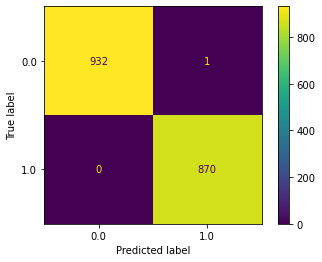

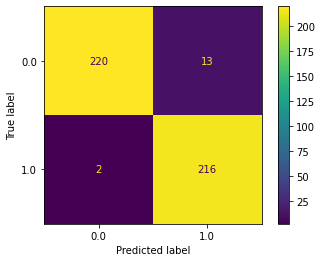

In [33]:
plot_confusion_matrix(clf_rf,X_train,y_train)
err = np.sum(clf_rf.predict(X_train) == y_train)/len(y_train)
Results[4,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rf, X_test,y_test)
err = np.sum(clf_rf.predict(X_test) == y_test)/len(y_test)
Results[4,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [34]:
cross_scores = cross_val_score(clf_rf, features, real_labels, cv=k)
Validation[4,:] = cross_scores
print("Scores for k = ", k)
print("-->", cross_scores)

Scores for k =  5
--> [1.         1.         1.         0.96008869 0.56      ]


## Gradient Boosting

In [35]:
parameters = {'n_estimators':[10,20,30,40], 'learning_rate':[0.01, 0.1, 1]}
clf_gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(clf_gb, parameters)
clf_gb.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [10, 20, 30, 40]})

In [36]:
print(clf_gb.best_params_)
Results[5,2]=clf_gb.best_params_

{'learning_rate': 1, 'n_estimators': 40}


In [37]:
# pendiente tunear
clf_gb = GradientBoostingClassifier(n_estimators = 40, learning_rate = 1, max_depth=2)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=40)

Error train: 0.0 %
Error test: 2.2172949002217335 %


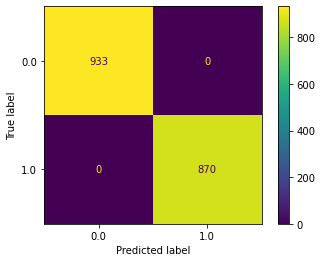

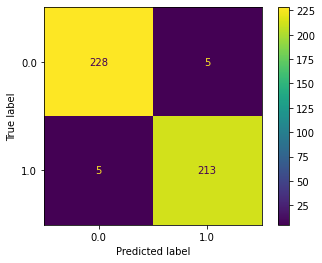

In [38]:
plot_confusion_matrix(clf_gb,X_train,y_train)
err = np.sum(clf_gb.predict(X_train) == y_train)/len(y_train)
Results[5,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_gb, X_test,y_test)
err = np.sum(clf_gb.predict(X_test) == y_test)/len(y_test)
Results[5,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [39]:
cross_scores = cross_val_score(clf_rf, features, real_labels, cv=k)
Validation[5,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [1.         1.         1.         0.95343681 0.56      ]


# Results

In [40]:
df = pd.DataFrame(data=Results, index=["Logistic Regression", "SVM linear kernel","SVM polynomial kernel","SVM rbf kernel","Random Forest", "Gradient Boosting"], columns=["Error train","Error test","Parameters"])

In [41]:
df

,Error train,Error test,Parameters
Logistic Regression,0.0%,8.425720620842569%,None
SVM linear kernel,0.0%,7.982261640798227%,{'C': 0.1}
SVM polynomial kernel,0.16638935108153063%,7.317073170731703%,"{'C': 1, 'degree': 2}"
SVM rbf kernel,0.88740987243483%,2.4390243902439046%,{'C': 1}
Random Forest,0.05546311702717688%,3.325942350332589%,"{'criterion': 'entropy', 'max_depth': 6}"
Gradient Boosting,0.0%,2.2172949002217335%,"{'learning_rate': 1, 'n_estimators': 40}"


In [42]:
print(df.to_latex(index=True) )

\begin{tabular}{llll}
\toprule
{} &           Error train &           Error test &                                Parameters \\
\midrule
Logistic Regression   &                  0.0\% &   8.425720620842569\% &                                      None \\
SVM linear kernel     &                  0.0\% &   7.982261640798227\% &                                \{'C': 0.1\} \\
SVM polynomial kernel &  0.16638935108153063\% &   7.317073170731703\% &                     \{'C': 1, 'degree': 2\} \\
SVM rbf kernel        &     0.88740987243483\% &  2.4390243902439046\% &                                  \{'C': 1\} \\
Random Forest         &  0.05546311702717688\% &   3.325942350332589\% &  \{'criterion': 'entropy', 'max\_depth': 6\} \\
Gradient Boosting     &                  0.0\% &  2.2172949002217335\% &  \{'learning\_rate': 1, 'n\_estimators': 40\} \\
\bottomrule
\end{tabular}



In [43]:
Av = []
for i in range(6):
    Av.append(np.mean(Validation[i,:]))
Av = np.array(Av)
Av = Av.reshape(Av.shape[0],1)
Validation = np.append(Validation, Av, axis = 1)

In [44]:
df2 = pd.DataFrame(data = Validation, index=["Logistic Regression", "SVM linear kernel","SVM polynomial kernel","SVM rbf kernel","Random Forest", "Gradient Boosting"], columns=["Fold 1","Fold 2", "Fold 3", "Fold 4", "Fold 5", "Average"])

In [45]:
df2

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Average
Logistic Regression,0.826543,0.955501,0.964436,0.912886,0.786464,0.889166
SVM linear kernel,0.86031,0.949002,0.973392,0.89357,0.764444,0.888144
SVM polynomial kernel,0.944568,0.949002,0.973392,0.920177,0.811111,0.91965
SVM rbf kernel,1.0,1.0,1.0,0.955654,0.677778,0.926686
Random Forest,1.0,1.0,1.0,0.960089,0.56,0.904018
Gradient Boosting,1.0,1.0,1.0,0.953437,0.56,0.902687


In [46]:
print(df2.to_latex(index=True, bold_rows = True))

\begin{tabular}{lllllll}
\toprule
{} &    Fold 1 &    Fold 2 &    Fold 3 &    Fold 4 &    Fold 5 &   Average \\
\midrule
\textbf{Logistic Regression  } &  0.826543 &  0.955501 &  0.964436 &  0.912886 &  0.786464 &  0.889166 \\
\textbf{SVM linear kernel    } &   0.86031 &  0.949002 &  0.973392 &   0.89357 &  0.764444 &  0.888144 \\
\textbf{SVM polynomial kernel} &  0.944568 &  0.949002 &  0.973392 &  0.920177 &  0.811111 &   0.91965 \\
\textbf{SVM rbf kernel       } &       1.0 &       1.0 &       1.0 &  0.955654 &  0.677778 &  0.926686 \\
\textbf{Random Forest        } &       1.0 &       1.0 &       1.0 &  0.960089 &      0.56 &  0.904018 \\
\textbf{Gradient Boosting    } &       1.0 &       1.0 &       1.0 &  0.953437 &      0.56 &  0.902687 \\
\bottomrule
\end{tabular}



## Dimensionality Reduction

In [47]:
X_e= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(features)

In [48]:
def plotPredictions(Xe,target,pred,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.title.set_text('Real')
    ax2.title.set_text('Predicted')
    ax1.scatter(Xe[target==0,0],Xe[target==0,1],c="c",label="Empty")
    ax1.scatter(Xe[target==1,0],Xe[target==1,1],c="black",label="Occupied")
    ax2.scatter(Xe[pred==0,0],Xe[pred==0,1],c="c",label="Empty")
    ax2.scatter(Xe[pred==1,0],Xe[pred==1,1],c="black",label="Occupied")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center')
    fig.set_size_inches(10, 5, forward=True)
    fig.suptitle(title)
    plt.show()

## Learning in lower dimensions (train best performance classifier in higher)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_e, real_labels, test_size=0.2, stratify = real_labels)

### Logistic Regression

In [50]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Error train: 22.351636161952303 %
Error test: 18.181818181818176 %


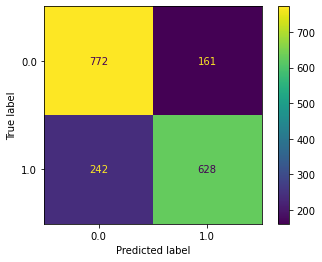

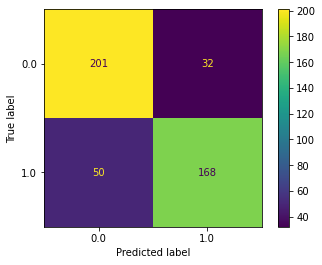

In [51]:
plot_confusion_matrix(logistic,X_train,y_train)
err = np.sum(logistic.predict(X_train) == y_train)/len(y_train)
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
print("Error test:",(1-err)*100,"%")

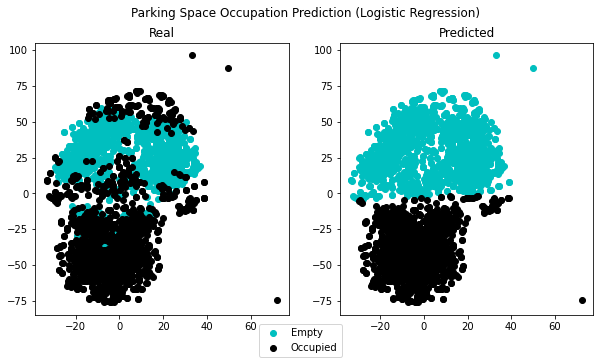

In [52]:
labels = logistic.predict(X_e)
plotPredictions(X_e, real_labels, labels,"Parking Space Occupation Prediction (Logistic Regression)")

### Gradient Boosting

In [53]:
clf_gb = GradientBoostingClassifier(learning_rate = 0.1)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier()

Error train: 11.92457016084304 %
Error test: 13.747228381374722 %


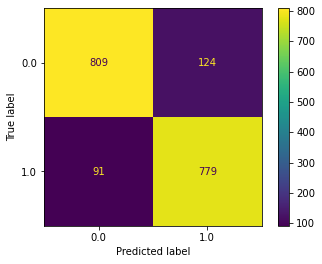

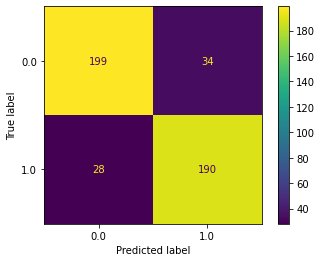

In [54]:
plot_confusion_matrix(clf_gb,X_train,y_train)
err = np.sum(clf_gb.predict(X_train) == y_train)/len(y_train)
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_gb, X_test,y_test)
err = np.sum(clf_gb.predict(X_test) == y_test)/len(y_test)
print("Error test:",(1-err)*100,"%")

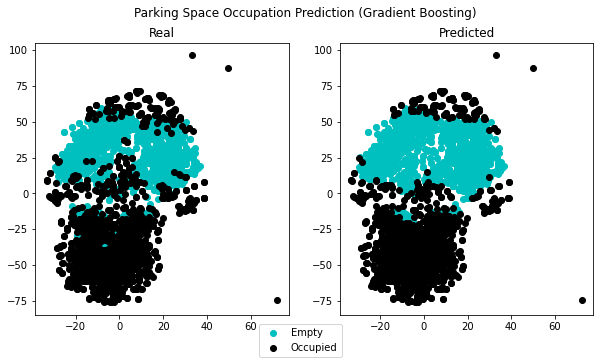

In [55]:
labels = clf_gb.predict(X_e)
plotPredictions(X_e, real_labels, labels,"Parking Space Occupation Prediction (Gradient Boosting)")

## Unsupervised Learning 

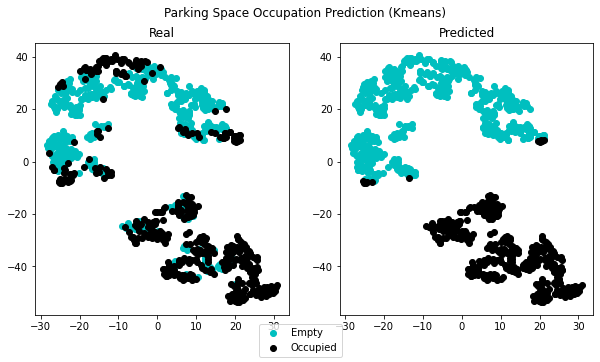

[[395  72]
 [130 305]]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_e, real_labels, test_size=0.4, stratify = real_labels)
X_etest= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_test) 
km = KMeans(n_clusters=2)
km.fit(X_train)
labels = km.predict(X_test)
plotPredictions(X_etest, y_test, labels,"Parking Space Occupation Prediction (Kmeans)")
print(sklearn.metrics.confusion_matrix(y_test,labels))